In [1]:
#imports
import numpy as np
import pandas as pd
import add_label as al
import label_to_adncon as lta
import data_preprocessing as dp
import tsne_plot_2 as tp2
import pca_plot as pp
import AgeSex_plot as asp
import amcon_select as aas
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
#load gene expression data and covariates
CBE_geneCounts = pd.read_csv('MayoRNAseq_RNAseq_CBE_geneCounts_normalized.tsv', sep='\t')
CBE_covariates = pd.read_csv('MayoRNAseq_RNAseq_CBE_covariates.csv')
TCX_geneCounts = pd.read_csv('MayoRNAseq_RNAseq_TCX_geneCounts_normalized.tsv', sep='\t')
TCX_covariates = pd.read_csv('MayoRNAseq_RNAseq_TCX_covariates.csv')

In [3]:
#add labels to gene expression data for CBE
CBE = al.add_label(CBE_geneCounts, CBE_covariates, 0)

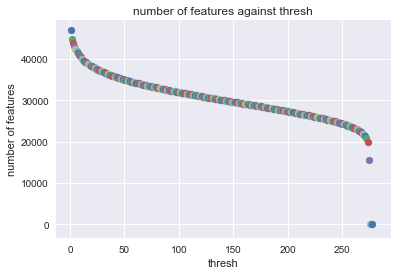

In [5]:
# plot of number of features against thresh for CBE
dp.data_preprocessing(CBE)

In [6]:
#remove features with all zeros and constant values for CBE
df= CBE.replace(0,pd.np.nan)
df=df.dropna(axis=1, thresh = 273)
d1=df.replace(pd.np.nan,0)
d1.shape

CBE_covariates.rename(columns={CBE_covariates.columns[0]: "ID" }, inplace=True)
covar_index = CBE_covariates[['ID','Diagnosis']]
covar_index_T = covar_index.T
covar_index_T.drop('ID',axis=0,inplace=True)
df = covar_index_T.rename(columns = CBE_covariates['ID'])
dft = df.T

CBE = pd.concat([dft, d1], axis = 1)
CBE.shape

(278, 19950)

In [7]:
#add labels to gene expression data for TCX
TCX = al.add_label(TCX_geneCounts, TCX_covariates, 0)

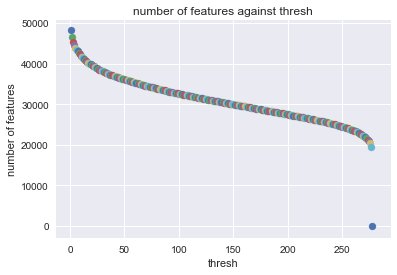

In [8]:
# plot of number of features against thresh for TCX
dp.data_preprocessing(TCX)

In [9]:
#remove features with all zeros and constant values for CBE
df= TCX.replace(0,pd.np.nan)
df=df.dropna(axis=1, thresh = 276)
d2=df.replace(pd.np.nan,0)

TCX_covariates.rename(columns={TCX_covariates.columns[0]: "ID" }, inplace=True)
covar_index = TCX_covariates[['ID','Diagnosis']]
covar_index_T = covar_index.T
covar_index_T.drop('ID',axis=0,inplace=True)
df = covar_index_T.rename(columns = TCX_covariates['ID'])
dft = df.T

TCX = pd.concat([dft, d2], axis = 1)
TCX.shape

(278, 19379)

In [10]:
#selecting labels 'AD' and 'Control' and changing to 1 and 0 for CBE
CBE_x, CBE_y = lta.label_to_adncon(CBE)
CBEanc = pd.concat([CBE_y, CBE_x], axis=1)
CBEanc.shape

(159, 19950)

In [11]:
#selecting labels 'AD' and 'Control' and changing to 1 and 0 for TCX
TCX_x, TCX_y = lta.label_to_adncon(TCX)
TCXanc = pd.concat([TCX_y, TCX_x], axis=1)
TCXanc.shape

(160, 19379)


There are 2 unique target valuess: [0 1]
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 319 samples in 0.214s...
[t-SNE] Computed neighbors for 319 samples in 2.340s...
[t-SNE] Computed conditional probabilities for sample 319 / 319
[t-SNE] Mean sigma: 3959.317744
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.378399
[t-SNE] Error after 1000 iterations: 0.397275


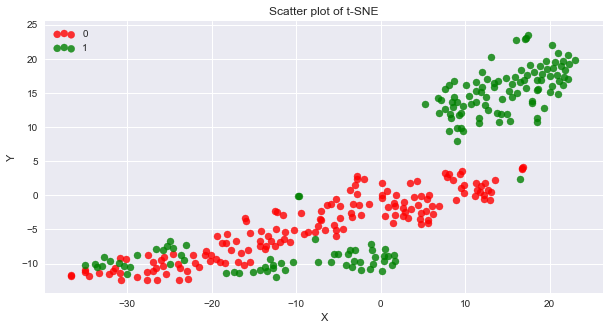

In [28]:
#t-SNE plot of merged CBE and TCX data
yc = CBE_y
yt = TCX_y
yc['Diagnosis'] = 1
yt['Diagnosis'] = 0
x_comb = pd.concat([CBE_x, TCX_x], axis=0, join='inner')
y_comb = pd.concat([yc, yt], axis=0)
tp2.tsne_plot_2(x_comb, y_comb, 2)


There are 2 unique target valuess: [0 1]
Explained variance: 0.9969
Individual variance contributions:
0.9553465175355615
0.017056110140326694
0.011122664957894834
0.005235877627711094
0.0028782203817644954
0.0018360025300113224
0.0011792786063080478
0.0009390429777135032
0.0007164958421383042
0.0005523976284636668


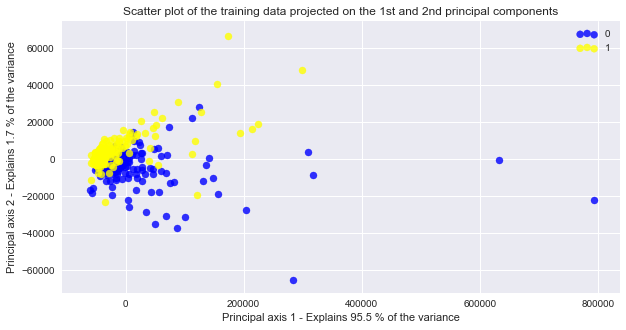

In [30]:
#PCA plot of merged CBE and TCX data
pp.pca_plot(x_comb, y_comb, 10)


There are 2 unique target valuess: [0 1]
Explained variance: 0.9960
Individual variance contributions:
0.9581131266950367
0.016315996728918557
0.006757396072757164
0.0060281931594912295
0.0033910216811671666
0.0019359085969717312
0.0012869141360898717
0.0008639036545258192
0.0007722664754757632
0.0005713981918076202


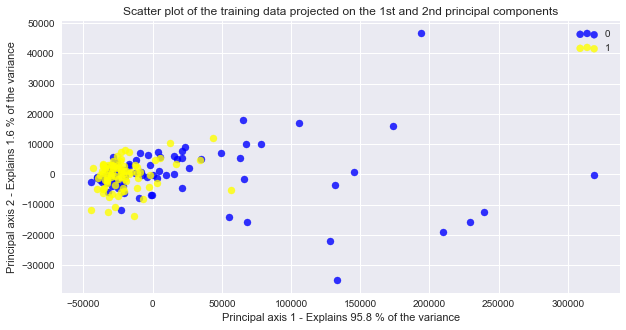

In [42]:
#pca plot for CBE
pp.pca_plot(CBE_x, CBE_y, 10)


There are 2 unique target valuess: [0 1]
Explained variance: 0.9985
Individual variance contributions:
0.9663146214177487
0.013049078657297168
0.010872188662487932
0.0027777421157494098
0.0021191615725225056
0.0012972370307631571
0.0006295689177979057
0.0005652168538922539
0.0004440753483496929
0.0003993521674802368


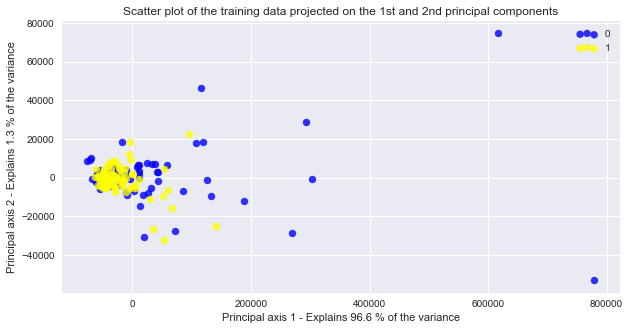

In [43]:
#pca plot for TCX
pp.pca_plot(TCX_x, TCX_y, 10)

In [16]:
#the distribution plot of age at death and the density plot of gender against age
#asp.AgeSex_plot(CBE_covariates)

In [12]:
#select common samples for CBE and TCX data set
finC, finT = aas.amcon_select(CBEanc, TCXanc)
print(finC.shape)
print(finT.shape)

(132, 19950)
(132, 19379)


In [13]:
#prepare data and labels for training for CBE
finC_y = finC['Diagnosis']
finC_y = pd.DataFrame(finC_y)
finC_y = finC_y.astype(int)
finC_x = finC.drop(['Diagnosis'], axis=1)
#prepare data and labels for training for TCX
finT_y = finT['Diagnosis']
finT_y = pd.DataFrame(finT_y)
finT_y = finT_y.astype(int)
finT_x = finT.drop(['Diagnosis'], axis=1)

In [77]:
#find the features id by recursively remove less important features until the last 8 ones for CBE
svc = LinearSVC()
rfe = RFE(estimator=svc, n_features_to_select=1, step=0.1)
rfe.fit(CBE_x, np.ravel(CBE_y))
ranking = rfe.ranking_
selection1 = CBE_x.iloc[:,np.where(ranking == 1)[0]]
selection2 = CBE_x.iloc[:,np.where(ranking == 2)[0]]
print(list(selection1))
print(list(selection2))

['ENSG00000112139']
['ENSG00000008710', 'ENSG00000079215', 'ENSG00000123560', 'ENSG00000198899', 'ENSG00000225630', 'ENSG00000229807', 'ENSG00000247556', 'ENSG00000280102']


In [79]:
#find the features id by recursively remove less important features until the last 8 ones for TCX
svc = LinearSVC()
rfe = RFE(estimator=svc, n_features_to_select=1, step=0.1)
rfe.fit(TCX_x, np.ravel(TCX_y))
ranking = rfe.ranking_
selection1 = TCX_x.iloc[:,np.where(ranking == 1)[0]]
selection2 = TCX_x.iloc[:,np.where(ranking == 2)[0]]
print(list(selection1))
print(list(selection2))

['ENSG00000064393']
['ENSG00000079215', 'ENSG00000080824', 'ENSG00000087460', 'ENSG00000131711', 'ENSG00000168309', 'ENSG00000180354', 'ENSG00000198727']


In [193]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [40]:
layer_size = [40, 50, 60, 70, 80]
#activ = ['logistic', 'tanh', 'relu']
#max_iteration = [1000, 1500, 2000]
#alphas = [0.0001, 0.001, 0.01, 0.1]

print('selected num of features: ', 10)

data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(CBE_x, CBE_y, test_size=0.1)

estimator = LinearSVC()
selector = RFE(estimator, 10, step=0.1)
data_rfe = selector.fit_transform(data_x_train, np.ravel(data_y_train))

for size in layer_size:

    print('layer_size: ', size)

    x_train, x_test, y_train, y_test = train_test_split(data_rfe, data_y_train)

    mlp = MLPClassifier(hidden_layer_sizes = [size,],
                        activation = 'logistic',
                        solver = 'lbfgs',
                        learning_rate_init = 0.0001,
                        max_iter = 1500,
                        alpha = 0.001)
    mlp.fit(x_train, np.ravel(y_train))
    y_pred = mlp.predict(x_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred), 'Loss: ', mlp.loss_)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

selected num of features:  10
layer_size:  40
Accuracy:  0.7222222222222222 Loss:  0.2980870052186847
[[12  4]
 [ 6 14]]
             precision    recall  f1-score   support

          0       0.67      0.75      0.71        16
          1       0.78      0.70      0.74        20

avg / total       0.73      0.72      0.72        36

layer_size:  50
Accuracy:  0.8333333333333334 Loss:  0.17740310798545234
[[17  1]
 [ 5 13]]
             precision    recall  f1-score   support

          0       0.77      0.94      0.85        18
          1       0.93      0.72      0.81        18

avg / total       0.85      0.83      0.83        36

layer_size:  60
Accuracy:  0.8333333333333334 Loss:  0.2872755593756154
[[19  0]
 [ 6 11]]
             precision    recall  f1-score   support

          0       0.76      1.00      0.86        19
          1       1.00      0.65      0.79        17

avg / total       0.87      0.83      0.83        36

layer_size:  70
Accuracy:  0.7777777777777778 Loss:

In [67]:
#imports of multi-layer perceptron with RFE feature selection
import mlp_fs as mf
import mlp_dir as md
import mlp_res as mr

In [69]:
mlp_CBE = mf.mlp_fs(CBE_x, CBE_y)

selected num of features:  5
             precision    recall  f1-score   support

          0       0.38      1.00      0.55         3
          1       1.00      0.58      0.74        12

avg / total       0.88      0.67      0.70        15

selected num of features:  10
             precision    recall  f1-score   support

          0       1.00      0.67      0.80         6
          1       0.82      1.00      0.90         9

avg / total       0.89      0.87      0.86        15

selected num of features:  15
             precision    recall  f1-score   support

          0       0.50      0.60      0.55         5
          1       0.78      0.70      0.74        10

avg / total       0.69      0.67      0.67        15

selected num of features:  20
             precision    recall  f1-score   support

          0       0.62      0.83      0.71         6
          1       0.86      0.67      0.75         9

avg / total       0.76      0.73      0.74        15

selected num of featu

In [70]:
mlp_TCX = mf.mlp_fs(TCX_x, TCX_y)

selected num of features:  5
             precision    recall  f1-score   support

          0       0.80      0.50      0.62         8
          1       0.60      0.86      0.71         7

avg / total       0.71      0.67      0.66        15

selected num of features:  10
             precision    recall  f1-score   support

          0       1.00      0.70      0.82        10
          1       0.62      1.00      0.77         5

avg / total       0.88      0.80      0.81        15

selected num of features:  15
             precision    recall  f1-score   support

          0       1.00      0.62      0.77         8
          1       0.70      1.00      0.82         7

avg / total       0.86      0.80      0.79        15

selected num of features:  20
             precision    recall  f1-score   support

          0       1.00      0.83      0.91         6
          1       0.90      1.00      0.95         9

avg / total       0.94      0.93      0.93        15

selected num of featu

In [73]:
mlp_dir = md.mlp_dir(finC_x, finC_y, finT_x, finT_y)

selected num of features:  5
             precision    recall  f1-score   support

          0       0.40      0.33      0.36         6
          1       0.43      0.50      0.46         6

avg / total       0.41      0.42      0.41        12

selected num of features:  10
             precision    recall  f1-score   support

          0       0.71      0.62      0.67         8
          1       0.40      0.50      0.44         4

avg / total       0.61      0.58      0.59        12

selected num of features:  15
             precision    recall  f1-score   support

          0       0.75      0.60      0.67         5
          1       0.75      0.86      0.80         7

avg / total       0.75      0.75      0.74        12

selected num of features:  20
             precision    recall  f1-score   support

          0       0.71      0.71      0.71         7
          1       0.60      0.60      0.60         5

avg / total       0.67      0.67      0.67        12

selected num of featu

In [74]:
mlp_res = mr.mlp_res(finC_x, finC_y, finT_x, finT_y)

selected num of features:  5
             precision    recall  f1-score   support

          0       0.80      0.57      0.67         7
          1       0.57      0.80      0.67         5

avg / total       0.70      0.67      0.67        12

selected num of features:  10
             precision    recall  f1-score   support

          0       0.83      0.71      0.77         7
          1       0.67      0.80      0.73         5

avg / total       0.76      0.75      0.75        12

selected num of features:  15
             precision    recall  f1-score   support

          0       0.50      0.80      0.62         5
          1       0.75      0.43      0.55         7

avg / total       0.65      0.58      0.57        12

selected num of features:  20
             precision    recall  f1-score   support

          0       0.67      0.57      0.62         7
          1       0.50      0.60      0.55         5

avg / total       0.60      0.58      0.59        12

selected num of featu

In [176]:
#imports of svc with Gaussian kernel using RFE feature selection
import rbf_svc_fs as rsf
import rbf_svc_dir as rsd
import rbf_svc_res as rsr

In [177]:
rbf_CBE = rsf.rbf_svc_fs(CBE_x, CBE_y)

selected num of features:  5
Accuracy =  0.65 std =  0.3745064779690951
selected num of features:  10
Accuracy =  0.5785714285714285 std =  0.45563366953763035
selected num of features:  15
Accuracy =  0.6 std =  0.4299976269512118
selected num of features:  20
Accuracy =  0.6142857142857143 std =  0.42281853105567835
selected num of features:  30
Accuracy =  0.5999999999999999 std =  0.43938732854942
selected num of features:  50
Accuracy =  0.6500000000000001 std =  0.3717718194192315
selected num of features:  75
Accuracy =  0.6071428571428572 std =  0.42167063266129834
selected num of features:  100
Accuracy =  0.6285714285714286 std =  0.40758121764820304
selected num of features:  250
Accuracy =  0.6142857142857142 std =  0.44629998148038025
selected num of features:  500
Accuracy =  0.5928571428571427 std =  0.44840988902055734
selected num of features:  1000
Accuracy =  0.6142857142857143 std =  0.4142857142857143
selected num of features:  5000
Accuracy =  0.5928571428571429 s

In [178]:
rbf_TCX = rsf.rbf_svc_fs(TCX_x, TCX_y)

selected num of features:  5
Accuracy =  0.6071428571428572 std =  0.42167063266129834
selected num of features:  10
Accuracy =  0.6142857142857143 std =  0.41674148988042353
selected num of features:  15
Accuracy =  0.6285714285714287 std =  0.3987224496272247
selected num of features:  20
Accuracy =  0.6214285714285714 std =  0.40664129507115093
selected num of features:  30
Accuracy =  0.65 std =  0.37586634619779624
selected num of features:  50
Accuracy =  0.75 std =  0.2696369441168125
selected num of features:  75
Accuracy =  0.6 std =  0.4216101303821059
selected num of features:  100
Accuracy =  0.5928571428571429 std =  0.43921311827552023
selected num of features:  250
Accuracy =  0.5857142857142856 std =  0.4389226141639205
selected num of features:  500
Accuracy =  0.5928571428571429 std =  0.43921311827552023
selected num of features:  1000
Accuracy =  0.6142857142857143 std =  0.4080816244881629
selected num of features:  5000
Accuracy =  0.5714285714285714 std =  0.4551

In [185]:
rbf_dir = rsd.rbf_svc_dir(finC_x, finC_y, finT_x, finT_y)

selected num of features:  5
Accuracy =  0.5757575757575757 std =  0.45172102282379256
selected num of features:  10
Accuracy =  0.5666666666666667 std =  0.46218082079540157
selected num of features:  15
Accuracy =  0.6878787878787879 std =  0.3337772526128763
selected num of features:  20
Accuracy =  0.5757575757575757 std =  0.45172102282379256
selected num of features:  30
Accuracy =  0.5757575757575757 std =  0.45172102282379256
selected num of features:  50
Accuracy =  0.6098484848484849 std =  0.41348995632942237
selected num of features:  75
Accuracy =  0.6181818181818182 std =  0.42529900895206735
selected num of features:  100
Accuracy =  0.6083333333333334 std =  0.4378768218473217
selected num of features:  250
Accuracy =  0.5583333333333333 std =  0.47147817199385456
selected num of features:  500
Accuracy =  0.5848484848484847 std =  0.4426965745480992
selected num of features:  1000
Accuracy =  0.5666666666666667 std =  0.47258156262526085
selected num of features:  5000

In [187]:
rbf_res = rsr.rbf_svc_res(finC_x, finC_y, finT_x, finT_y)

selected num of features:  5
Accuracy =  0.5924242424242424 std =  0.44237235063053787
selected num of features:  10
Accuracy =  0.6196969696969696 std =  0.41039075200308817
selected num of features:  15
Accuracy =  0.6106060606060606 std =  0.420863164804714
selected num of features:  20
Accuracy =  0.5833333333333333 std =  0.45338235029118146
selected num of features:  30
Accuracy =  0.5757575757575757 std =  0.45172102282379256
selected num of features:  50
Accuracy =  0.5848484848484847 std =  0.4408257757375778
selected num of features:  75
Accuracy =  0.5848484848484847 std =  0.4426965745480992
selected num of features:  100
Accuracy =  0.5674242424242424 std =  0.4613934905999911
selected num of features:  250
Accuracy =  0.5583333333333333 std =  0.47147817199385456
selected num of features:  500
Accuracy =  0.5583333333333333 std =  0.47147817199385456
selected num of features:  1000
Accuracy =  0.5583333333333333 std =  0.47147817199385456
selected num of features:  5000
A

In [222]:
#imports of linear svc with RFE feature selection
import lin_svc_fs as lsf
import lin_svc_dir as lsd
import lin_svc_res as lsr

In [223]:
CBE_acc = lsf.lin_svc_fs(CBE_x, CBE_y)

selected num of features:  5
Accuracy =  0.9714285714285715 std =  0.08571428571428572
selected num of features:  10
Accuracy =  0.9714285714285715 std =  0.08571428571428572
selected num of features:  15
Accuracy =  0.9571428571428571 std =  0.10690449676496974
selected num of features:  20
Accuracy =  0.9361904761904762 std =  0.1080690129714612
selected num of features:  30
Accuracy =  0.8533333333333333 std =  0.09618104621386508
selected num of features:  50
Accuracy =  0.8871428571428572 std =  0.11155568655077183
selected num of features:  75
Accuracy =  0.8938095238095238 std =  0.09752143784318537
selected num of features:  100
Accuracy =  0.7957142857142858 std =  0.1479175170043585
selected num of features:  250
Accuracy =  0.8152380952380952 std =  0.14075919837594145
selected num of features:  500
Accuracy =  0.7961904761904763 std =  0.15218439704170678
selected num of features:  1000
Accuracy =  0.7699999999999999 std =  0.11147434957085374
selected num of features:  500

In [224]:
TCX_acc = lsf.lin_svc_fs(TCX_x, TCX_y)

selected num of features:  5
Accuracy =  0.9571428571428571 std =  0.1285714285714286
selected num of features:  10
Accuracy =  0.9642857142857142 std =  0.10714285714285712
selected num of features:  15
Accuracy =  0.9576190476190476 std =  0.10678670966250535
selected num of features:  20
Accuracy =  0.9714285714285713 std =  0.04738035414793428
selected num of features:  30
Accuracy =  0.9304761904761903 std =  0.1436833252649161
selected num of features:  50
Accuracy =  0.9290476190476191 std =  0.12778329870750493
selected num of features:  75
Accuracy =  0.8928571428571429 std =  0.1636634176769943
selected num of features:  100
Accuracy =  0.8866666666666667 std =  0.12018126898550366
selected num of features:  250
Accuracy =  0.895238095238095 std =  0.1398411797560202
selected num of features:  500
Accuracy =  0.921904761904762 std =  0.1334727162621431
selected num of features:  1000
Accuracy =  0.8947619047619048 std =  0.1071894078768874
selected num of features:  5000
Accu

In [226]:
dir_acc = lsd.lin_svc_dir(finC_x, finC_y, finT_x, finT_y)

selected num of features:  5
Accuracy =  0.9666666666666666 std =  0.07637626158259735
selected num of features:  10
Accuracy =  0.9234848484848486 std =  0.10970209681639492
selected num of features:  15
Accuracy =  0.9242424242424242 std =  0.12054741988433991
selected num of features:  20
Accuracy =  0.8568181818181818 std =  0.18302785719818757
selected num of features:  30
Accuracy =  0.8477272727272727 std =  0.12791369981573888
selected num of features:  50
Accuracy =  0.7628787878787879 std =  0.11638346185277985
selected num of features:  75
Accuracy =  0.7901515151515153 std =  0.12457687799412125
selected num of features:  100
Accuracy =  0.8734848484848484 std =  0.09253904941022678
selected num of features:  250
Accuracy =  0.781060606060606 std =  0.1341764835653592
selected num of features:  500
Accuracy =  0.718939393939394 std =  0.1387191340927873
selected num of features:  1000
Accuracy =  0.7356060606060606 std =  0.16334324195502647
selected num of features:  5000


In [228]:
res_acc = lsr.lin_svc_res(finC_x, finC_y, finT_x, finT_y)

selected num of features:  5
Accuracy =  0.9568181818181818 std =  0.08769900627988517
selected num of features:  10
Accuracy =  0.9568181818181818 std =  0.08769900627988517
selected num of features:  15
Accuracy =  0.8878787878787879 std =  0.13976400153431934
selected num of features:  20
Accuracy =  0.8265151515151515 std =  0.18718254423650277
selected num of features:  30
Accuracy =  0.8113636363636365 std =  0.16200257624724307
selected num of features:  50
Accuracy =  0.6924242424242425 std =  0.1763769129648131
selected num of features:  75
Accuracy =  0.6606060606060605 std =  0.13877497624291388
selected num of features:  100
Accuracy =  0.7772727272727273 std =  0.15144695434915334
selected num of features:  250
Accuracy =  0.7499999999999999 std =  0.17988237152356068
selected num of features:  500
Accuracy =  0.75 std =  0.1719880513499776
selected num of features:  1000
Accuracy =  0.7507575757575757 std =  0.18455795598796954
selected num of features:  5000
Accuracy =  

In [14]:
#imports of linear svc with t-test feature selection
import lin_svc_t as lst
import lin_svc_tdir as lstd
import lin_svc_tres as lstr

In [15]:
t_CBE = lst.lin_svc_t(CBE_x, CBE_y)

selected num of features:  5
Accuracy =  0.9692307692307693 std =  0.09230769230769231
selected num of features:  10
Accuracy =  0.9692307692307693 std =  0.09230769230769231
selected num of features:  15
Accuracy =  0.9608974358974359 std =  0.09291334428568958
selected num of features:  20
Accuracy =  0.9608974358974359 std =  0.09291334428568958
selected num of features:  30
Accuracy =  0.9038461538461539 std =  0.13950226162805585
selected num of features:  50
Accuracy =  0.9448717948717948 std =  0.09170028072947521
selected num of features:  75
Accuracy =  0.9358974358974359 std =  0.1109178134531279
selected num of features:  100
Accuracy =  0.9365384615384615 std =  0.07716042442834192
selected num of features:  250
Accuracy =  0.9282051282051281 std =  0.07567361314550618
selected num of features:  500
Accuracy =  0.8955128205128207 std =  0.09164873412545403
selected num of features:  1000
Accuracy =  0.873076923076923 std =  0.08512859128735402
selected num of features:  500

In [16]:
t_TCX = lst.lin_svc_t(TCX_x, TCX_y)

selected num of features:  5
Accuracy =  0.9692307692307693 std =  0.09230769230769231
selected num of features:  10
Accuracy =  0.9615384615384615 std =  0.11538461538461538
selected num of features:  15
Accuracy =  0.9615384615384615 std =  0.11538461538461538
selected num of features:  20
Accuracy =  0.9365384615384615 std =  0.11932206320124086
selected num of features:  30
Accuracy =  0.9532051282051281 std =  0.11531515002995044
selected num of features:  50
Accuracy =  0.9294871794871794 std =  0.13531563899444884
selected num of features:  75
Accuracy =  0.9141025641025641 std =  0.13516979849330465
selected num of features:  100
Accuracy =  0.9147435897435896 std =  0.13519563587835323
selected num of features:  250
Accuracy =  0.8762820512820513 std =  0.14657076163300947
selected num of features:  500
Accuracy =  0.85 std =  0.12027390392687838
selected num of features:  1000
Accuracy =  0.8512820512820513 std =  0.11668779746648977
selected num of features:  5000
Accuracy =

In [18]:
t_dir = lstd.lin_svc_tdir(finC_x, finC_y, finT_x, finT_y)

selected num of features:  5000
Accuracy =  0.6527272727272727 std =  0.19678406170762092
selected num of features:  1000
Accuracy =  0.7172727272727272 std =  0.21514746048249353
selected num of features:  500
Accuracy =  0.7490909090909091 std =  0.19717844416410024
selected num of features:  250
Accuracy =  0.8254545454545456 std =  0.17636363636363636
selected num of features:  100
Accuracy =  0.7763636363636364 std =  0.173310021742436
selected num of features:  75
Accuracy =  0.7954545454545454 std =  0.1705242281809075
selected num of features:  50
Accuracy =  0.8618181818181819 std =  0.18496369981143293
selected num of features:  30
Accuracy =  0.8436363636363637 std =  0.19691001426796015
selected num of features:  20
Accuracy =  0.890909090909091 std =  0.12217045401696247
selected num of features:  15
Accuracy =  0.9218181818181819 std =  0.08683602862734219
selected num of features:  10
Accuracy =  0.9609090909090909 std =  0.06556178084401014
selected num of features:  5


In [19]:
t_res = lstr.lin_svc_tres(finC_x, finC_y, finT_x, finT_y)

selected num of features:  5000
Accuracy =  0.6418181818181818 std =  0.1860951502825307
selected num of features:  1000
Accuracy =  0.7181818181818181 std =  0.2135106012813044
selected num of features:  500
Accuracy =  0.7690909090909092 std =  0.16886593048729173
selected num of features:  250
Accuracy =  0.8536363636363637 std =  0.1408621622733748
selected num of features:  100
Accuracy =  0.9118181818181819 std =  0.0829268322325906
selected num of features:  75
Accuracy =  0.9118181818181819 std =  0.0829268322325906
selected num of features:  50
Accuracy =  0.8736363636363638 std =  0.08939188492759895
selected num of features:  30
Accuracy =  0.940909090909091 std =  0.07959089611131194
selected num of features:  20
Accuracy =  0.9209090909090911 std =  0.08701192090837488
selected num of features:  15
Accuracy =  0.9509090909090909 std =  0.0664569704818075
selected num of features:  10
Accuracy =  0.9600000000000002 std =  0.07999999999999999
selected num of features:  5
Acc